EDA; Untersuche die Korrelation zwischen Persönlichkeitsmerkmalen under Bewertung von Filmen. Ggf. mit MDS / Isomap / PCA einen Psychologischen Score berechnen. Diesen Score kann man dann bewerten, inwiefern er mit den Filmewertungen korreliert (Pearson / Spearman / Mutual Information)

In [134]:
import pandas as pd

psych_data = pd.read_csv("../data/personality-data.csv", sep=", ")
rating_data = pd.read_csv("../data/ratings.csv", sep=", ")
movie_data = pd.read_csv("../data/movies.csv")

rating_data

C:\Users\fschuller\AppData\Local\Temp\ipykernel_41808\588505610.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  psych_data = pd.read_csv("../data/personality-data.csv", sep=", ")
C:\Users\fschuller\AppData\Local\Temp\ipykernel_41808\588505610.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rating_data = pd.read_csv("../data/ratings.csv", sep=", ")


,useri,movie_id,rating,tstamp
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,2001-09-10 17:19:56
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,2001-09-28 11:34:55
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,2001-09-28 11:42:50
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,2001-09-28 11:27:30
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,2002-01-07 18:12:02
...,...,...,...,...
1028746,721ea658e148fc0f76ddd6e2b0e02422,95167,1.5,2015-10-14 10:39:15
1028747,721ea658e148fc0f76ddd6e2b0e02422,103335,4.5,2015-10-14 10:21:55
1028748,721ea658e148fc0f76ddd6e2b0e02422,104374,3.5,2015-10-12 01:05:38
1028749,721ea658e148fc0f76ddd6e2b0e02422,107890,4.0,2015-10-14 05:30:08


In [24]:
user_ratings = rating_data[rating_data["useri"] == "8e7cebf9a234c064b75016249f2ac65e"]
user_ratings

,useri,movie_id,rating,tstamp
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,2001-09-10 17:19:56
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,2001-09-28 11:34:55
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,2001-09-28 11:42:50
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,2001-09-28 11:27:30
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,2002-01-07 18:12:02
...,...,...,...,...
6414,8e7cebf9a234c064b75016249f2ac65e,195921,3.0,2019-01-22 22:03:25
6415,8e7cebf9a234c064b75016249f2ac65e,196307,4.5,2018-12-09 14:47:24
6416,8e7cebf9a234c064b75016249f2ac65e,196607,4.0,2018-12-18 09:40:24
6417,8e7cebf9a234c064b75016249f2ac65e,196889,3.0,2019-01-19 21:54:28


In [131]:
movie1_ratings = rating_data[rating_data["movie_id"] == 18]
user_data_filtered = psych_data[["userid", "openness", "agreeableness", "emotional_stability",
       "conscientiousness", "extraversion"]]
data = user_data_filtered.merge(rating_data, left_on="userid", right_on="useri")[["openness", "agreeableness", "emotional_stability",
       "conscientiousness", "extraversion", "rating", "movie_id"]].merge(movie_data, left_on="movie_id", right_on="movieId").drop(columns=["movieId"])

types = ["Horror", "Animation", "Romance", "Documentary", "Comedy", "Musical"]
for t in types:
       data[t] = data["genres"].apply(lambda s : 1 if t in s else 0)

rating_data_by_genre = data[["openness", "agreeableness", "emotional_stability",
       "conscientiousness", "extraversion", "rating","Horror", "Animation", "Romance", "Documentary", "Comedy", "Musical", "movie_id"]]

rating_data_by_genre

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,rating,Horror,Animation,Romance,Documentary,Comedy,Musical,movie_id
0,5.0,2.0,3.0,2.5,6.5,5.0,0,1,0,0,1,0,1
1,4.0,3.0,4.5,2.0,2.5,3.5,0,1,0,0,1,0,1
2,5.5,5.5,4.0,4.5,4.0,2.0,0,1,0,0,1,0,1
3,5.5,5.5,3.5,4.5,2.5,3.0,0,1,0,0,1,0,1
4,5.5,4.5,6.0,3.0,4.0,4.5,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051929,5.5,3.5,5.5,4.5,4.5,2.5,0,0,0,0,0,0,116895
1051930,5.0,3.5,1.5,3.5,2.5,2.0,0,1,0,0,0,0,173489
1051931,5.0,3.5,1.5,3.5,2.5,3.0,0,0,0,0,1,0,174923
1051932,5.0,3.5,1.5,3.5,2.5,4.5,0,0,0,0,0,0,182863


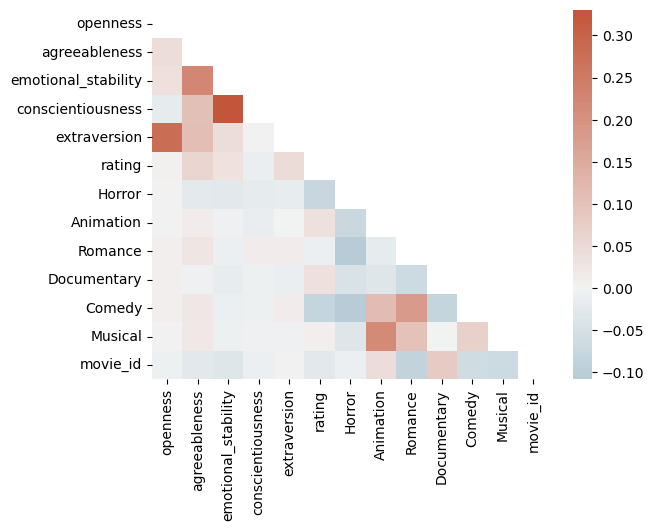

In [132]:
import seaborn as sns
import numpy as np

corr = rating_data_by_genre.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0)

plt.show()


3.364819941175017
5.3650053140216025 6.114964029334518
4.2007274220626005 5.141426445582236
4.590133981789732 5.847667779374949
4.6971768190780026 5.783622145981315
3.4140235984386855 4.810526502809028


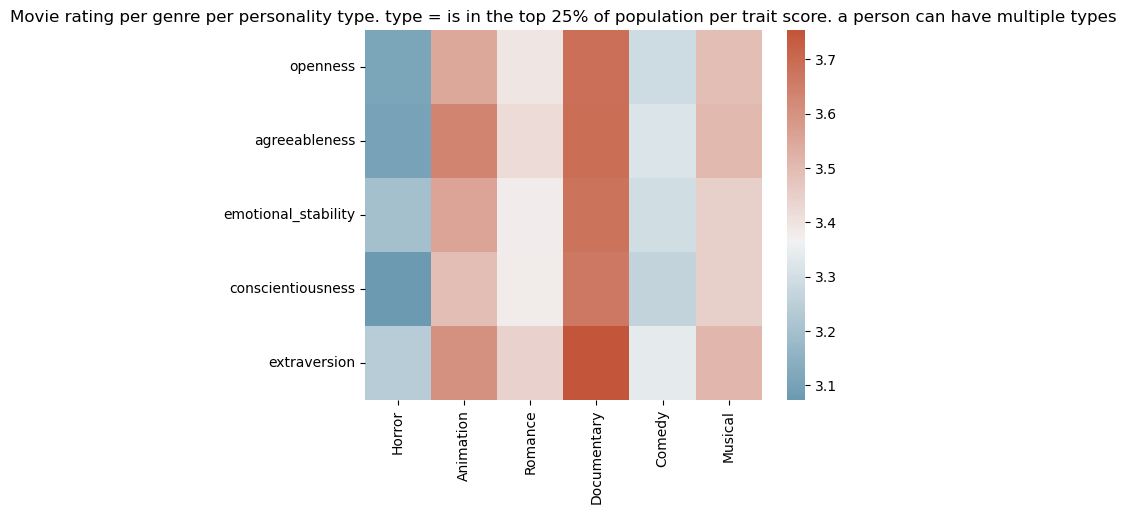

C:\Users\fschuller\AppData\Local\Temp\ipykernel_41808\3722879536.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_top_type["type"] = data_with_top_type[traits].idxmax(axis=1)


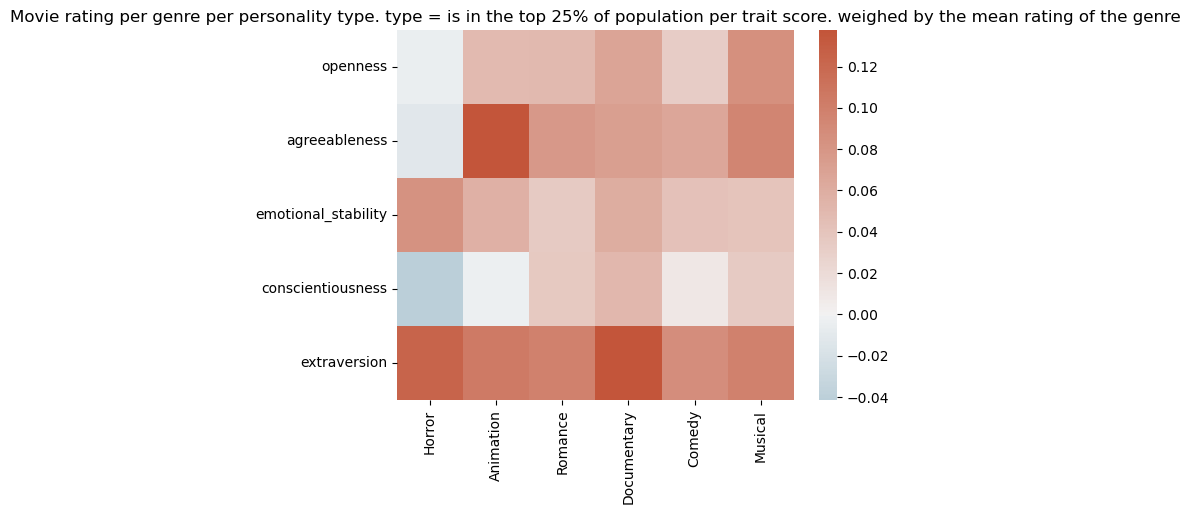

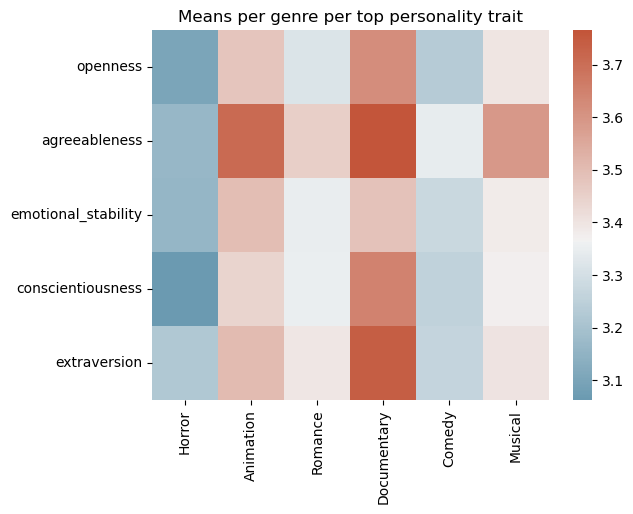

In [105]:
import scipy.stats as st
import matplotlib.pyplot as plt

mean_ratings = np.zeros([5, 6])
traits = ["openness", "agreeableness", "emotional_stability",
       "conscientiousness", "extraversion"]

global_mean = rating_data_by_genre["rating"].mean()
print(global_mean)
for i in range(0, 5):
    trait = traits[i]
    trait_avg = rating_data_by_genre[trait].mean()
    trait_var = rating_data_by_genre[trait].var()
    cutoff = st.norm.ppf(0.75, trait_avg, trait_var)
    print(trait_avg, cutoff)
    special_individuals = rating_data_by_genre[rating_data_by_genre[trait] > cutoff]
    for j in range(0, 6):
        genre = types[j]
        mean_ratings[i, j] = special_individuals[special_individuals[genre] == 1]["rating"].mean()


plt.title("Movie rating per genre per personality type. type = is in the top 25% of population per trait score. a person can have multiple types")
sns.heatmap(mean_ratings, center=global_mean, cmap=cmap, yticklabels=traits, xticklabels=types)
plt.show()
means_per_genre = np.zeros([5, 6])

for j in range(0, 6):
    genre = types[j]
    m = rating_data_by_genre[rating_data_by_genre[genre] == 1]["rating"].mean()
    for i in range(0, 5):
        means_per_genre[i, j] = m

plt.show()
plt.title("Movie rating per genre per personality type. type = is in the top 25% of population per trait score. weighed by the mean rating of the genre")
sns.heatmap(mean_ratings - means_per_genre, center=0, cmap=cmap, yticklabels=traits, xticklabels=types)


mean_ratings_top_type = np.zeros([5, 6])
traits = ["openness", "agreeableness", "emotional_stability",
       "conscientiousness", "extraversion"]

data_with_top_type = rating_data_by_genre
data_with_top_type["type"] = data_with_top_type[traits].idxmax(axis=1)

for i in range(0, 5):
    trait = traits[i]
    special_individuals = data_with_top_type[data_with_top_type["type"] == trait]
    for j in range(0, 6):
        genre = types[j]
        mean_ratings_top_type[i, j] = special_individuals[special_individuals[genre] == 1]["rating"].mean()
plt.show()
plt.title("Means per genre per top personality trait")
sns.heatmap(mean_ratings_top_type, center=global_mean, cmap=cmap, yticklabels=traits, xticklabels=types)
plt.show()

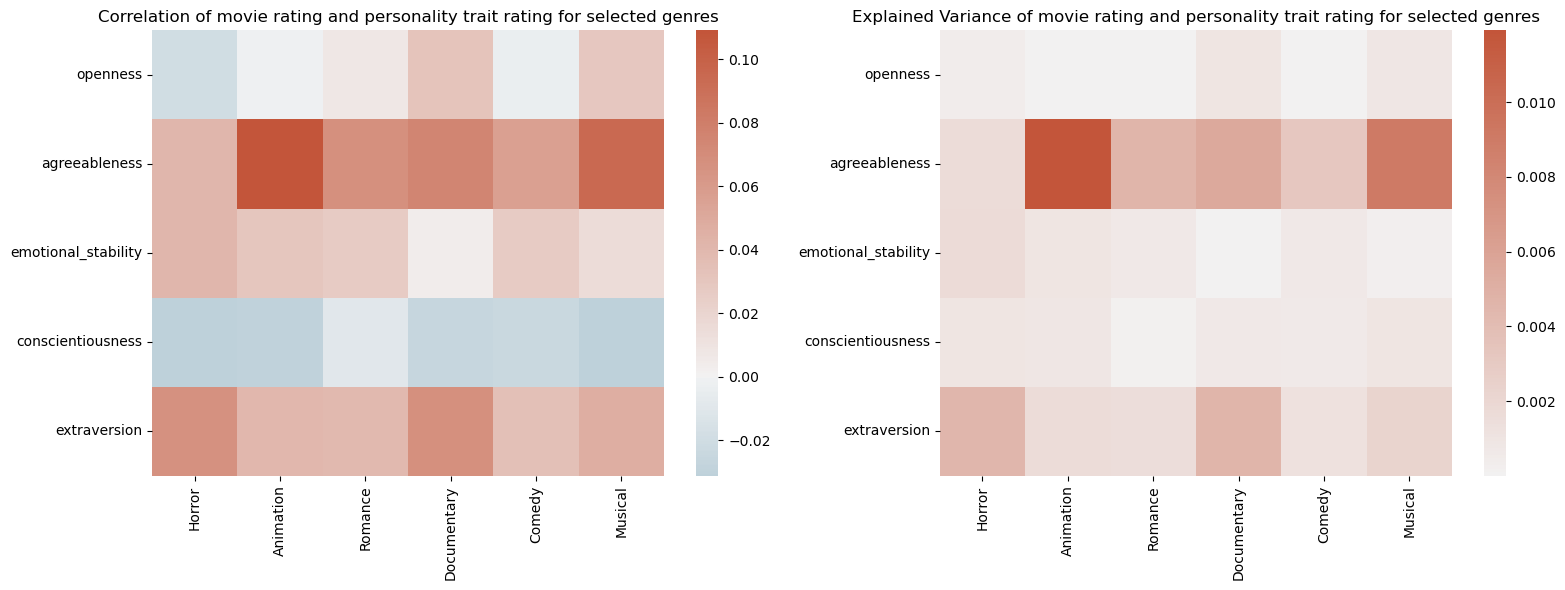

In [116]:
correlations_per_genre = np.zeros([5, 6])
r2_per_genre = np.zeros([5, 6])

for j in range(0, 6):
    genre = types[j]
    genre_data = rating_data_by_genre[rating_data_by_genre[genre] == 1]
    for i in range(0, 5):
        trait = traits[i]
        X = genre_data[trait].to_numpy().flatten()
        Y = genre_data["rating"].to_numpy().flatten()
        c = np.corrcoef(X, Y)[0, 1]
        correlations_per_genre[i, j] = c
        r2_per_genre[i, j] = c**2  


fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(correlations_per_genre, cmap=cmap, center=0,yticklabels=traits, xticklabels=types, ax=axes[0])
axes[0].set_title("Correlation of movie rating and personality trait rating for selected genres")

sns.heatmap(r2_per_genre, cmap=cmap, center=0,yticklabels=traits, xticklabels=types, ax=axes[1])
axes[1].set_title("Explained Variance of movie rating and personality trait rating for selected genres")

plt.tight_layout()
plt.show()


In [142]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5).fit(rating_data_by_genre[traits].transpose())
score = pca.components_[0]
print(score)
print("Erklährte Varianz: ", pca.explained_variance_ratio_)

[ 0.00106838 -0.00046636 -0.00031564 ... -0.00052527 -0.00052527
 -0.00052527]
Erklährte Varianz:  [4.47881391e-01 2.39328585e-01 1.66581743e-01 1.46208281e-01
 3.38566964e-26]


In [143]:
X = score.flatten()
Y = rating_data_by_genre["rating"].to_numpy().flatten()
print("Erklährte Varianz der Filmbewertung durch die Persönlichkeits-Kennzahl: ", np.corrcoef(X, Y)[0, 1] ** 2)

Erklährte Varianz der Filmbewertung durch die Persönlichkeits-Kennzahl:  0.0017505282755486855


In [157]:
def perform_rating_eval(genre):
    this_movie_data = data[data["genres"].apply(lambda s : genre in s)]
    pca = PCA(n_components=5).fit(this_movie_data[traits].transpose())
    score = pca.components_[0]
    
    X = score.flatten()
    Y = this_movie_data["rating"].to_numpy().flatten()
    
    return np.corrcoef(X, Y)[0, 1]

for g in ["Horror", "Animation", "Romance", "Documentary", "Comedy", "Musical", "Action", "Crime", "Thriller", "Drama", "War", "Mystery"]:
    print("Die Bewertung von ", g, "-Filmen wird durch den Persönlichkeitsscore zu ", perform_rating_eval(g) ** 2, " erklährt")

Die Bewertung von  Horror -Filmen wird durch den Persönlichkeitsscore zu  0.0061498765464411105  erklährt
Die Bewertung von  Animation -Filmen wird durch den Persönlichkeitsscore zu  0.002228961650720316  erklährt
Die Bewertung von  Romance -Filmen wird durch den Persönlichkeitsscore zu  0.001369083294765886  erklährt
Die Bewertung von  Documentary -Filmen wird durch den Persönlichkeitsscore zu  0.004051591869576247  erklährt
Die Bewertung von  Comedy -Filmen wird durch den Persönlichkeitsscore zu  0.0016087918939890957  erklährt
Die Bewertung von  Musical -Filmen wird durch den Persönlichkeitsscore zu  0.0019173479019336378  erklährt
Die Bewertung von  Action -Filmen wird durch den Persönlichkeitsscore zu  0.0013207472538025232  erklährt
Die Bewertung von  Crime -Filmen wird durch den Persönlichkeitsscore zu  0.0014839104000949903  erklährt
Die Bewertung von  Thriller -Filmen wird durch den Persönlichkeitsscore zu  0.002198308797812721  erklährt
Die Bewertung von  Drama -Filmen wird d

In [176]:
# Idee von ChatGPT: Lineare Regression auf allen 5 Persönlichkeitsmerkmalen, dann R2 aus pred und true

from sklearn.linear_model import LinearRegression

X = data[traits]
Y = data["rating"]
reg = LinearRegression().fit(X, Y)
pred = reg.predict(X)
print("Die erklährte Varianz (Pearson ^ 2) der Filmbewertungen durch die Persönlichkeits-Faktoren ist", np.corrcoef(Y, pred)[0, 1] ** 2)

print("Bei Spezifischen Genren sollte Pearson größer sein: ")

def perform_rating_eval_linreg(genre):
    genre_data = data[data["genres"].apply(lambda s : genre in s)]
    X = genre_data[traits]
    Y = genre_data["rating"]
    reg = LinearRegression().fit(X, Y)
    pred = reg.predict(X)
    
    return np.corrcoef(Y, pred)[0, 1]

for g in ["Horror", "Animation", "Romance", "Documentary", "Comedy", "Musical", "Action", "Crime", "Thriller", "Drama", "War", "Mystery"]:
    print("Die Bewertung von ", g, "-Filmen wird durch den Persönlichkeitsscore zu ", perform_rating_eval_linreg(g), " erklährt")

Die erklährte Varianz (Pearson ^ 2) der Filmbewertungen durch die Persönlichkeits-Faktoren ist 0.006475685584537986
Bei Spezifischen Genren sollte Pearson größer sein: 
Die Bewertung von  Horror -Filmen wird durch den Persönlichkeitsscore zu  0.10196055663833392  erklährt
Die Bewertung von  Animation -Filmen wird durch den Persönlichkeitsscore zu  0.12254695044891403  erklährt
Die Bewertung von  Romance -Filmen wird durch den Persönlichkeitsscore zu  0.07951272405310533  erklährt
Die Bewertung von  Documentary -Filmen wird durch den Persönlichkeitsscore zu  0.10500095929911854  erklährt
Die Bewertung von  Comedy -Filmen wird durch den Persönlichkeitsscore zu  0.0761901135502461  erklährt
Die Bewertung von  Musical -Filmen wird durch den Persönlichkeitsscore zu  0.11193128606702607  erklährt
Die Bewertung von  Action -Filmen wird durch den Persönlichkeitsscore zu  0.09680163671343765  erklährt
Die Bewertung von  Crime -Filmen wird durch den Persönlichkeitsscore zu  0.06816685748143406  